# <font color='deepskyblue'>Step 1 - Load your data.</font>

You can load data in several formats including NiFTI, DICOM, .mat etc. once required steps (README.ipynb) are followed .
In this example, we will load data which is stored in Octave native format (.mat). 

**demoMTR.mat includes following image volumes:** 

* mapF  (3D volume that conveys macromolecular pool size information) 
* mtOn  (3D volume after the magnetization transfer (MT) pulse)
* mtOff (3D volume before the MT pulse)
* mask  (3D binary ROI mask) 

<font color='salmon'> Now, you can execute the next cell **(click on the cell, then hit ctrl+enter)** to load the data to your workspace and display
the variables in the current scope.</font>

In [2]:
load demoMTR.mat
whos

Variables in the current scope:

   Attr Name        Size                     Bytes  Class
   ==== ====        ====                     =====  ===== 
        ans         1x5                          5  char
        mapF      128x135x75               5184000  single
        mask      128x135x75               5184000  single
        mtOff     128x135x75               5184000  single
        mtOn      128x135x75               5184000  single

Total is 5184005 elements using 20736005 bytes

'imrotate' is a function from the file /Users/Agah/octave/image-2.6.1/imrotate.m

 -- Function File:  imrotate (IMGPRE, THETA, METHOD, BBOX, EXTRAPVAL)
     Rotate image about its center.

     Input parameters:

     IMGPRE   a gray-level image matrix

     THETA    the rotation angle in degrees counterclockwise

     The optional argument METHOD defines the interpolation method to be
     used.  All methods supported by `interp2' can be used.  In
     addition, Fourier interpolation by decomposing the

# <font color='deepskyblue'>Step 2 - Calculate and visualize!</font>

**The following cell will perform two simple calculations:**

* Magnetization Transfer Ratio (MTR) Calculation 
* MTR vs FMap Correlation

For detailed information please see (https://arxiv.org/abs/1701.02760). 


<p><font color='salmon'> **Please pay attention to the comments in the following cell.**</font></p>



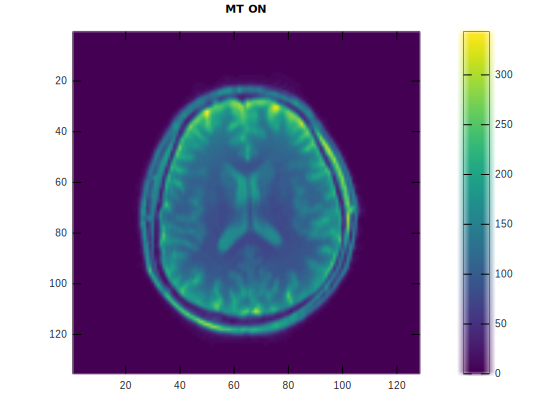

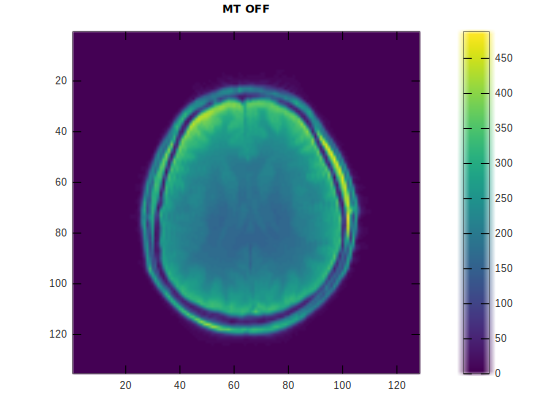

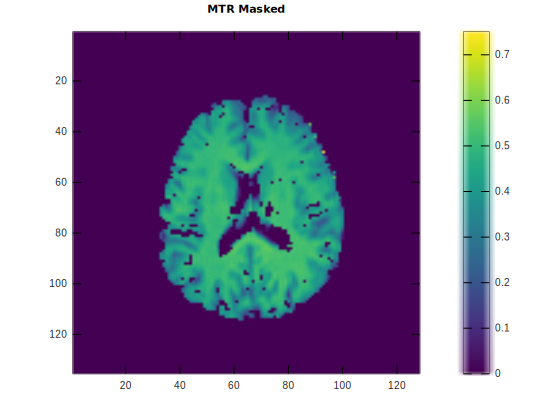

In [5]:
pkg load image; % This will load Octave image package, which is already installed on this image.

MTR = abs(mtOn-mtOff)./mtOff;

MTR(isnan(MTR)) = 0;
mapF(isnan(MTR)) = 0;

mapF(~mask) = 0;
MTR(~mask)=0;

% ----------------------------
% INTERACT! 
% ----------------------------

% These notebooks are interactive on your browser! 
% For example, you can change "slice" number (out of 75 slices) interactively.

slice = 35;

% Choose which output images will be displayed.

figure; imagesc(imrotate(mtOn(:,:,slice),90)); title('MT ON'); colorbar();
figure; imagesc(imrotate(mtOff(:,:,slice),90)); title('MT OFF'); colorbar();
%figure; imagesc(mask(:,:,35)); title('mask'); colorbar();
figure; imagesc(imrotate(MTR(:,:,slice),90));  title('MTR Masked'); colorbar();

% Calculate correlation between MTR image and FMap. 

Fim = mapF(:,:,slice);
MTRim = MTR(:,:,slice);
Fim_vec = Fim(Fim>0); 
MTRim_vec = MTRim(MTRim>0);
Fvec = Fim_vec(:);
MTRvec = MTRim_vec(:);
pcor = corr(Fvec,MTRvec);

% ----------------------------
% DISPLAY CORRELATION PLOTS
% ----------------------------

% OPTION - 1
% ----------------------------
% Correlation plots can be visualized here by uncommenting the next line.
% figure; scatter(Fvec,MTRvec); title(['Pearson ' num2str(pcor)]); xlabel('F Map'); ylabel('MTR');

% OPTION - 2
% ----------------------------
% Open lgnPlot notebook after running this script. lgnPlot will read output.mat (to be generated by the next line)
% and will display plots using pyhton libraries, including interactive plots! 

% Save outputs
save -mat7-binary 'output.mat' 'Fvec' 'MTRvec'

<center>The MIT License (MIT)</center>

<center>Copyright (c) 2014 Ecole Polytechnique, Université de Montréal</center>

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.


<img src="https://avatars3.githubusercontent.com/u/7755716?v=4&s=200" align="center" style="width:128px;height:128px;">

